# Frobenius norm statistical comparison

In this notebook, we determine if there is a statistically significant difference between afferent and efferent connectivity profiles using Frobenius norm as a metric.

In [1]:
# get shared (72 regions both project to and receive from the hpc) afferent and efferent feature vectors 

from helpers import get_feature_vectors_shared_hpc, get_correlation_matrix

df_avg_to_shared, df_avg_from_shared = get_feature_vectors_shared_hpc()

In [2]:
df_avg_to_shared

Abbr.,SI,MS,NDB,BSTam,BSTju,BSTpr,BSTif,BSTtr,BSTd,LSr.m.v,...,LHAsfa,REr,REc,PVT,PT,AV,AMd,IAM,SMT,VTA
DG,0.0,5.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
CA3,0.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
CA2,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
CA1v,2.0,3.0,1.0,0.0,2.0,0.0,0.0,1.0,3.0,1.0,...,2.0,5.0,6.0,3.0,4.0,1.0,1.0,1.0,1.0,4.0
CA1d,0.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,6.0,1.0,2.0,3.0,6.0,2.0,1.0,3.0
SUBv,2.0,5.0,2.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,1.0,5.0,6.0,6.0,4.0,5.0,1.0,0.0,0.0,3.0
SUBd,0.0,3.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.0,6.0,0.0,1.0,3.0,2.0,2.0,0.0,2.0


In [91]:
df_avg_from_shared

,SI,MS,NDB,BSTam,BSTju,BSTpr,BSTif,BSTtr,BSTd,LSr.m.v,...,LHAsfa,REr,REc,PVT,PT,AV,AMd,IAM,SMT,VTA
Abbr.,,,,,,,,,,,,,,,,,,,,,
DG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CA3,1.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CA2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CA1v,2.0,3.0,3.0,1.0,0.0,2.0,4.0,4.0,0.0,4.0,...,1.0,4.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0
CA1d,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
SUBv,2.0,0.0,0.0,4.0,1.0,1.0,4.0,4.0,4.0,6.0,...,0.0,6.0,4.0,5.0,2.0,0.0,0.0,1.0,0.0,2.0
SUBd,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,3.0,0.0,2.0,3.0,0.0,4.0,2.0,1.0


In [92]:
df_cosine_to = get_correlation_matrix(df_avg_to_shared, 'cosine')
df_cosine_from = get_correlation_matrix(df_avg_from_shared, 'cosine')

In [93]:
df_cosine_to_vector = df_cosine_to.values.flatten()
df_cosine_from_vector = df_cosine_from.values.flatten()

In [94]:
import numpy as np

observed_frob_norm = np.linalg.norm(df_cosine_to_vector - df_cosine_from_vector)
observed_frob_norm

np.float64(24.61836024172295)

In [132]:
def get_null_matrices_element_swaps(df_avg_to, df_avg_from):
    df_null_afferent = df_avg_to.copy(deep=True)
    df_null_efferent = df_avg_from.copy(deep=True)
    
    rows = len(df_avg_to_shared.index)
    cols = len(df_avg_to_shared.columns)
    
    # for each entry in matrix, flip a coin on whether to swap afferent and efferent value
    for r in range(rows):
        for c in range(cols):
            swap = np.random.binomial(n=1, p=0.5)
            if swap:
                df_null_afferent.iloc[r,c] = df_avg_from.iloc[r,c]
                df_null_efferent.iloc[r,c] = df_avg_to.iloc[r,c]
            
    return (df_null_efferent, df_null_afferent)

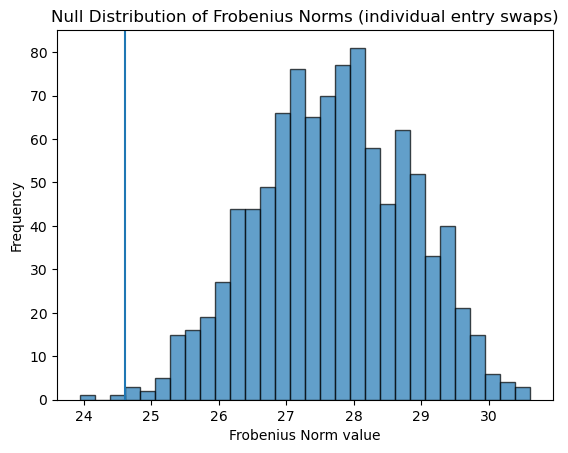

In [134]:
# Next we run a bootstrapping analysis 
# iterate N times
# for each iteration: 
# - randomly swap an identical entry between afferent and efferent connectivity matrix 10,000 times
# - calculate the frob_norm, save it in a vector
import pandas as pd

N = 1000
frob_norm_results = np.zeros(N)
# num_swaps = 1000

for i in range(N):
    # reset null matrices to original feature vectors
    df_null_efferent, df_null_afferent = get_null_matrices_element_swaps(df_avg_to_shared, df_avg_from_shared)
            
    
    # calculate the cosine similarity matrix, flatten it and compute the frobenius norm
    df_cosine_null_aff = get_correlation_matrix(df_null_afferent, 'cosine')
    df_cosine_null_eff = get_correlation_matrix(df_null_efferent, 'cosine')

    df_cosine_aff_null_vector = df_cosine_null_aff.values.flatten()
    df_cosine_eff_null_vector = df_cosine_null_eff.values.flatten()
    
    # calculate frobenius norm using null matrices
    null_frob_norm = np.linalg.norm(df_cosine_aff_null_vector - df_cosine_eff_null_vector)
    frob_norm_results[i] = null_frob_norm


# 3. Quick visualization
plt.hist(frob_norm_results, bins=30, edgecolor='black', alpha=0.7)
plt.title(f"Null Distribution of Frobenius Norms (individual entry swaps)")
plt.axvline(observed_frob_norm)
plt.xlabel("Frobenius Norm value")
plt.ylabel("Frequency")
plt.show()

In [113]:
# 
extreme_count = np.sum(frob_norm_results >= observed_frob_norm)
extreme_count

np.int64(992)

In [118]:
# proportion
proportion_greater = extreme_count / N
print(f'{proportion_greater * 100}% of null networks differences had higher Frobenius Norm than observed')

99.2% of null networks differences had higher Frobenius Norm than observed


## Next we swap a whole column at a time, rather than just individual entries

In [125]:
def get_null_matrices(df_avg_to, df_avg_from):
    df_null_afferent = df_avg_to.copy(deep=True)
    df_null_efferent = df_avg_from.copy(deep=True)
    
    rois = df_null_afferent.columns
    
    for region in rois:
        swap = np.random.binomial(n=1, p=0.5)
        if swap:
            temp = df_avg_to[region]
            df_null_afferent[region] = df_avg_from[region]
            df_null_efferent[region] = temp
            
    return (df_null_efferent, df_null_afferent)

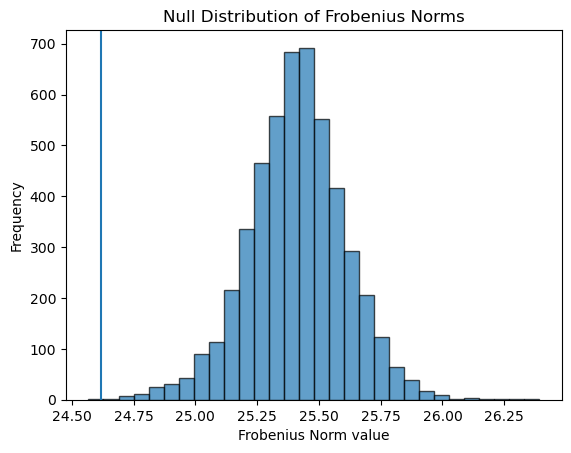

In [128]:
# Next we run a bootstrapping analysis 
# iterate N times
# for each iteration: 
# - randomly swap an identical entry between afferent and efferent connectivity matrix 10,000 times
# - calculate the frob_norm, save it in a vector
import pandas as pd

N = 5000
frob_norm_results_column_swapping = np.zeros(N)

for i in range(N):
    # get null afferent and efferent
    df_null_efferent, df_null_afferent = get_null_matrices(df_avg_to_shared, df_avg_from_shared)
    
    # calculate the cosine similarity matrix, flatten it and compute the frobenius norm
    df_cosine_null_aff = get_correlation_matrix(df_null_afferent, 'cosine')
    df_cosine_null_eff = get_correlation_matrix(df_null_efferent, 'cosine')

    df_cosine_aff_null_vector = df_cosine_null_aff.values.flatten()
    df_cosine_eff_null_vector = df_cosine_null_eff.values.flatten()
    
    # calculate frobenius norm using null matrices
    null_frob_norm = np.linalg.norm(df_cosine_aff_null_vector - df_cosine_eff_null_vector)
    frob_norm_results_column_swapping[i] = null_frob_norm


# 3. Quick visualization
plt.hist(frob_norm_results_column_swapping, bins=30, edgecolor='black', alpha=0.7)
plt.title(f"Null Distribution of Frobenius Norms")
plt.axvline(observed_frob_norm)
plt.xlabel("Frobenius Norm value")
plt.ylabel("Frequency")
plt.show()